# **Multple Linear Regression**



**Mounting google drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


**importing required libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

**importing dataset**

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HealthInsuranceData.csv')
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


**Separating the features/inputs and targets/outputs**

In [ ]:
X = dataset.iloc[:, 2:5:2].values
print(X)
y = dataset.iloc[:, -1].values
print(y)

[[27.9 'yes']
 [33.77 'no']
 [33.0 'no']
 ...
 [36.85 'no']
 [25.8 'no']
 [29.07 'yes']]
[16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]


**Encoding categorical data**

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

**Verifying encoded data=YES/NO**

In [ ]:
X[:16]

array([[0.0, 1.0, 27.9],
       [1.0, 0.0, 33.77],
       [1.0, 0.0, 33.0],
       [1.0, 0.0, 22.705],
       [1.0, 0.0, 28.88],
       [1.0, 0.0, 25.74],
       [1.0, 0.0, 33.44],
       [1.0, 0.0, 27.74],
       [1.0, 0.0, 29.83],
       [1.0, 0.0, 25.84],
       [1.0, 0.0, 26.22],
       [0.0, 1.0, 26.29],
       [1.0, 0.0, 34.4],
       [1.0, 0.0, 39.82],
       [0.0, 1.0, 42.13],
       [1.0, 0.0, 24.6]], dtype=object)

**Splitting the dataset into Training set and Test set**

In [ ]:
required_test_size = 0.03
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = required_test_size, random_state = 0)



**Training the Multiple Linear Regression model on the Trainig set**

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

**Predicting the test set results**

In [ ]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(y_test)


[ 9724.53  8547.69 45702.02 12950.07  9644.25  4500.34  2198.19 11436.74
  7537.16  5425.02  6753.04 10493.95  7337.75  4185.1  18310.74 10702.64
 12523.6   3490.55  6457.84 33475.82 23967.38 12643.38 23045.57 23065.42
  1674.63  4667.61  3732.63  7682.67  3756.62  8413.46  8059.68 48970.25
 12979.36 20630.28 14571.89  4137.52  8347.16 51194.56 40003.33  1880.49
  5458.05]


In [ ]:
print(y_pred)

[ 8256.35  7941.32 35760.41 11361.18  3644.66  4906.71  6781.75 10603.95
  8260.15  8584.67  4005.25  6745.69  8142.48  6020.73 31180.98  7482.04
  6024.52  9125.55  7899.56 32010.33 29774.7   9630.37  8512.56 30926.68
  9611.39 10964.54  3356.19  9319.13  6563.5   8368.32  7683.21 35978.66
 10989.21 10951.25 28152.07  7394.74 11281.47 34179.53 32803.62  9433.
  4329.77]


**Creating X-axis size from no of rows in predicted data**

In [ ]:
print(len(y_pred))
row_size = len(y_pred) + 1
x_axis_range = np.arange(1, row_size)
print(x_axis_range)

41
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]


**Plotting**

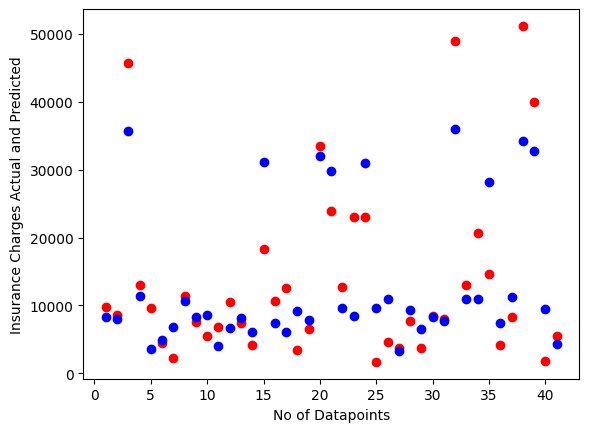

In [ ]:
plt.scatter(x_axis_range, y_test, color = 'red')
plt.xlabel('No of Datapoints')
plt.ylabel('Insurance charges Actual and Predicted')
plt.scatter(x_axis_range, y_pred, color = 'blue')
plt.xlabel('No of Datapoints')
plt.ylabel('Insurance Charges Actual and Predicted')
plt.show()